<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060">&Uuml;bungsblatt 13</h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2023</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Abgabe**: <span style="color:#82a8cf"> 3.7.2023, 12:00 Uhr </span> <span style="float:right;">**Besprechung**: 5.7.2023 - 7.7.2023.</span></font>

<font size="4" color="#606060">**Name**: <span style="color:#82a8cf"> Bitte geben Sie Ihren Namen an.  </span> </font>

<hr style="height:.3px"> 

<span style="color:#606060; font-weight:bold; font-size:20px"> Aufgaben auf Übungsblatt 13</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 34: Integration mit gezinkten Würfeln [10 Punkte] </span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 35: Integration auf Irrwegen [10 Punkte]</span>
- <span style="color:#82a8cf; font-weight:bold; font-size:16px"> Aufgabe 36 (Bonus): Dendritenwachstum  [8 Bonus-Punkte] </span>

<hr style="height:.3px"> 

<table style="border-style: none; width: 100%; background-color: #FFFFFF"><tr style="border-style: none;">
<td style="border-style: none; width:1%; text-align: left; font-size: 25px; font-weight: 200;background-color: #FFFFFF">Aufgabe 36: Dendritenwachstum</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px;background-color: #FFFFFF">[8 Bonus-Punkte]</td></tr></table>

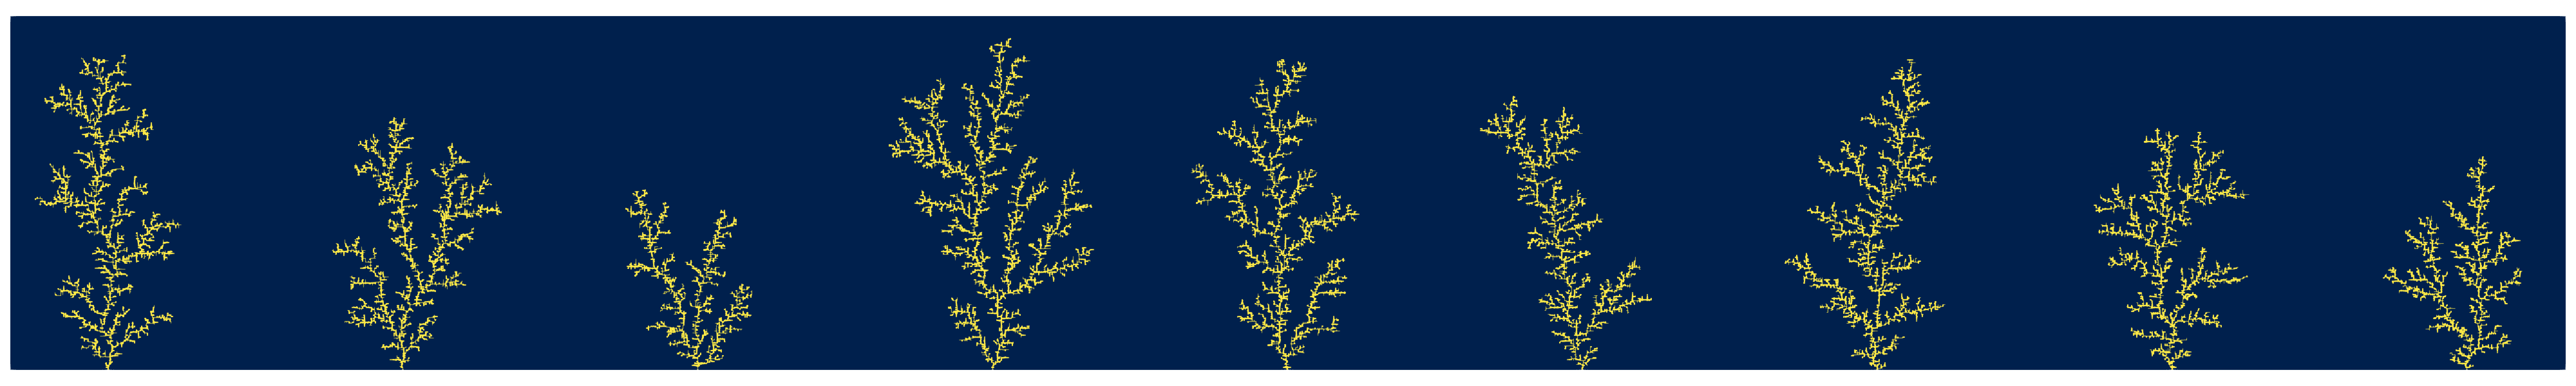

Verästelte Kristallstrukturen &ndash; sogenannte Dendriten &ndash; entstehen durch die **zufällige Anlagerung diffusiver Teilchen**. Den Wachstumsprozess eines solchen Dendriten wollen wir in dieser Aufgabe illustrieren, indem wir den Zufallslauf einzelner Teilchen simulieren. 

Dazu gehen wir wie folgt vor: Wir betrachten eine Experimentierscheibe mit Radius $R$, auf der nur diskrete Positionen $(x_i,y_i)$ besetzt werden können. Etwa in der Mitte der Scheibe befindet sich ein *Seed*, ein erstes unbewegliches Teilchen. Nun startet ein weiteres Teilchen an beliebiger Position auf dem Rand der Scheibe. 
In jedem Schritt bewegt sich das Teilchen mit gleicher Wahrscheinlichkeit in eine von vier Richtungen (oben/unten/links/rechts). Diese diffusive Bewegung dauert an, bis das Teilchen an den bestehenden Kristall andockt, also eine Position erreicht, in deren unmittelbaren Nachbarschaft (oben/unten/links/rechts) sich ein bereits fixiertes Teilchen befindet. In einem solchen Fall fixieren wir die Position des Teilchens und starten das nächste Teilchen vom Rand. Sollte das Teilchen während der Simulation von der Scheibe wandern, also einen Abstand größer als $R$ vom Mittelpunkt erreichen, dann verwerfen wir das aktuelle Teilchen und starten ein neues Teilchen auf dem Rand.

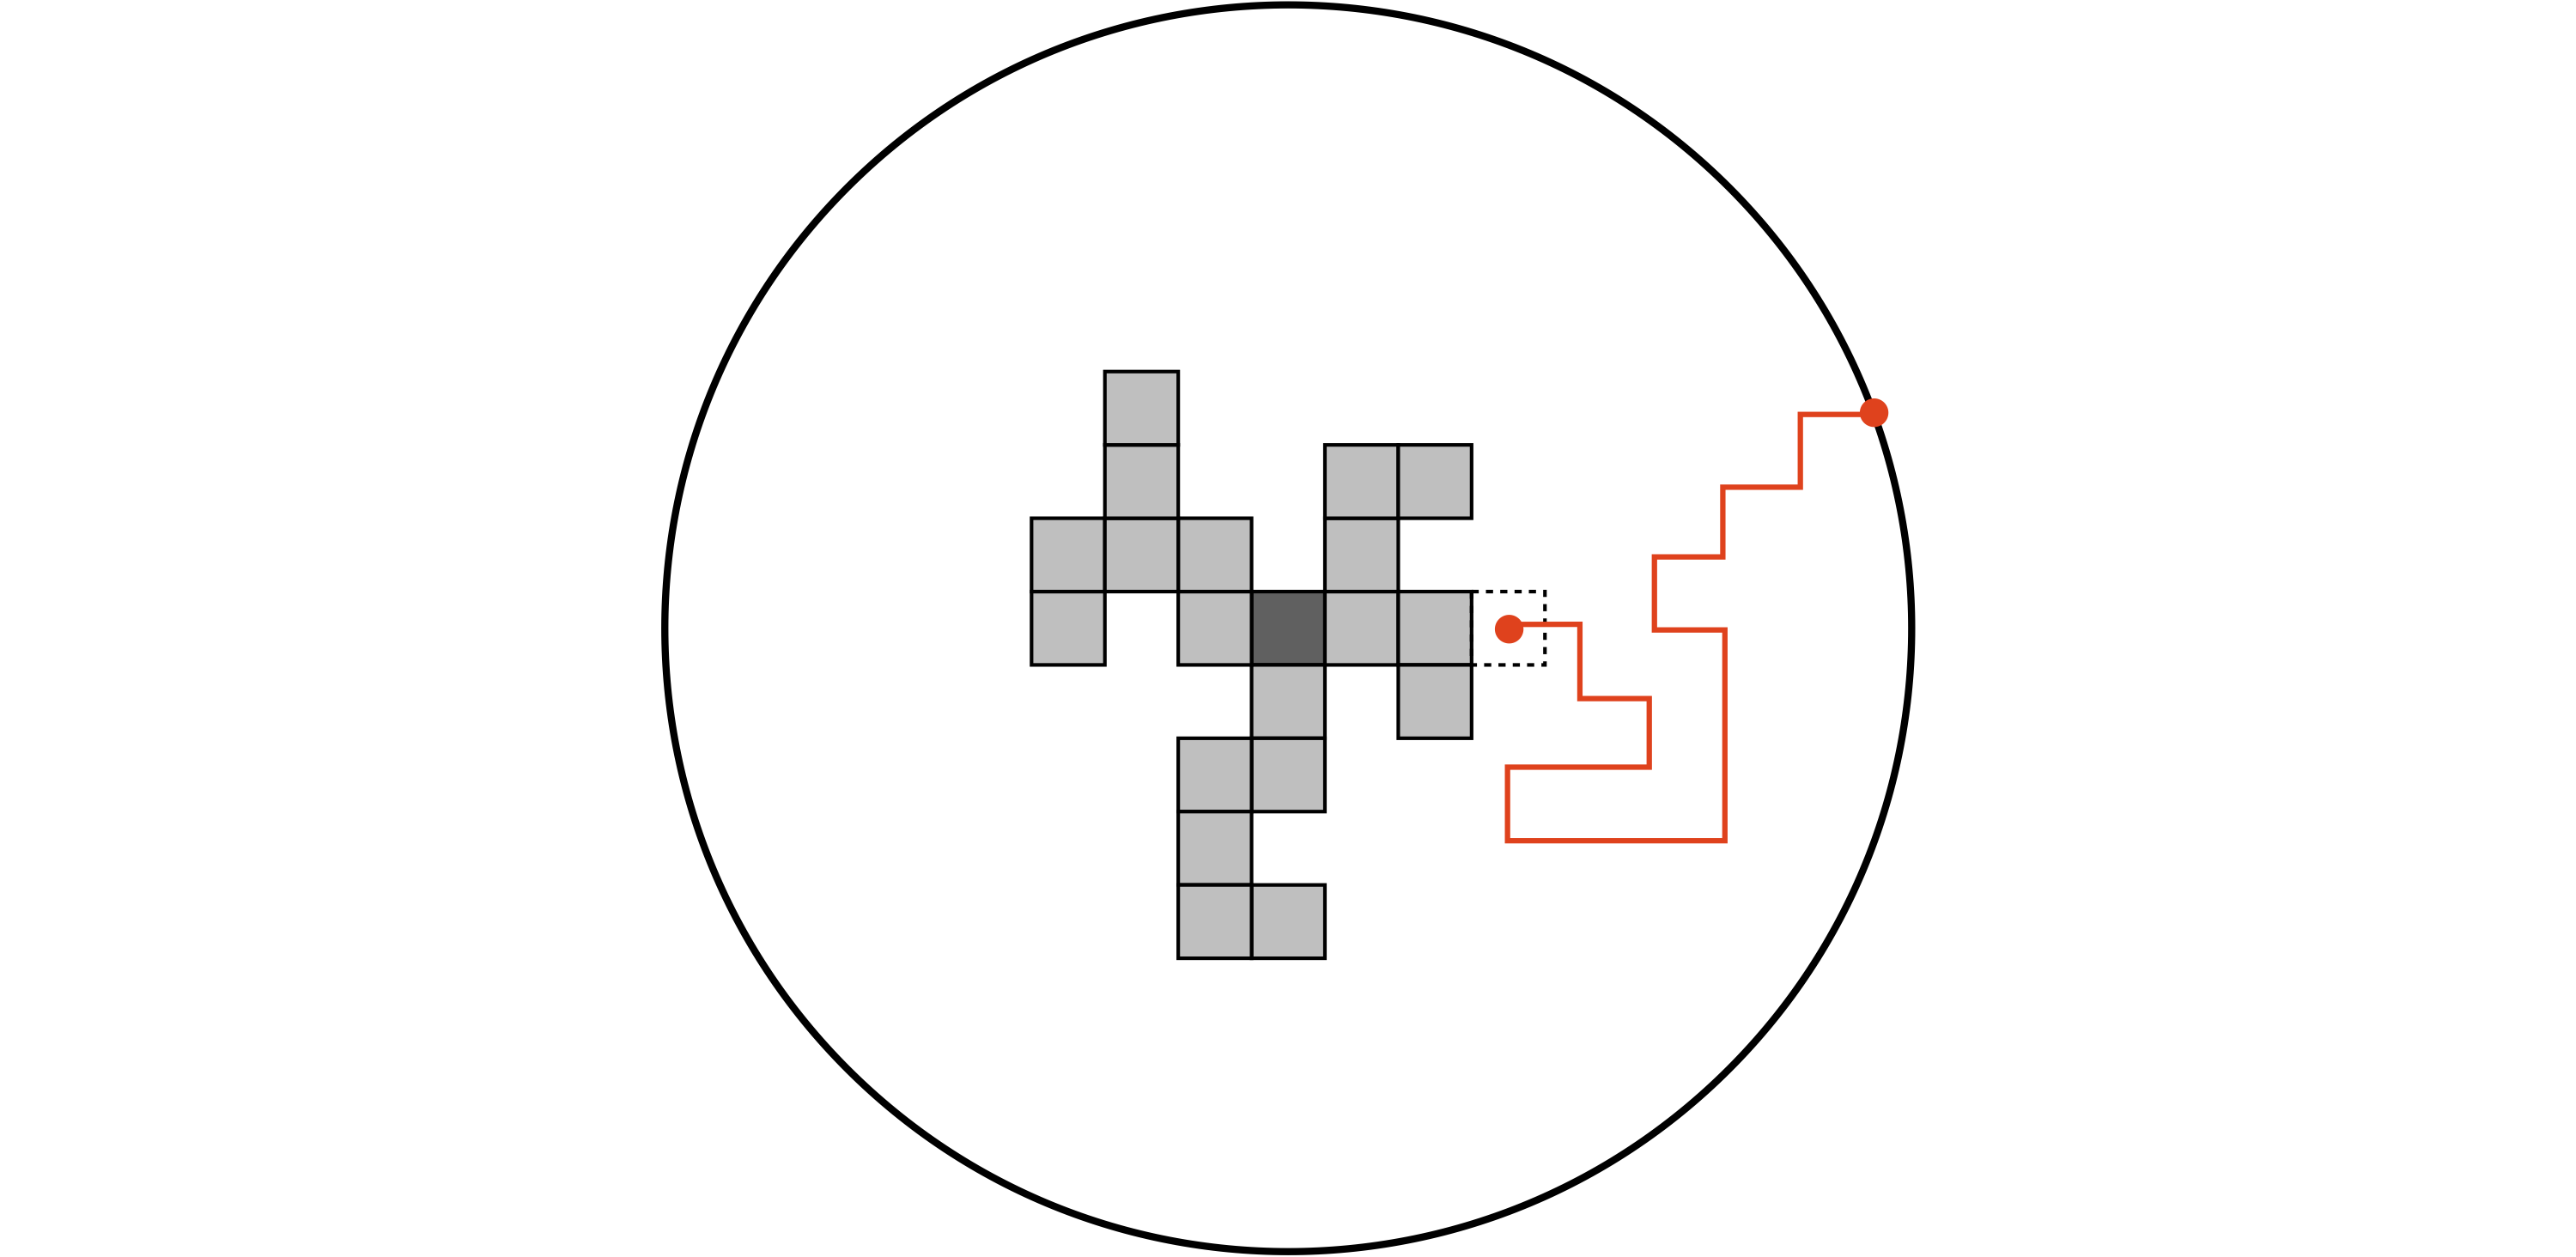

Simulieren Sie das Wachstum eines derartigen Dendriten auf einem Raster von $128 \times 128$ Positionen und einer Experimentierscheibe mit Radius $R=64$. Stellen Sie die gewachsene Struktur grafisch dar.

Wer sich ein wenig über die historische Entwicklung dieses im Englischen als *diffusion limited aggregation* bezeichneten Phänomens informieren möchte, der sei auf diesen [Bericht](http://garfield.library.upenn.edu/classics1993/A1993KX31200001.pdf) seines Entdeckers Thomas Witten von der University of Chicago verwiesen.

*Hinweis:* Eine konzeptionelle Schwierigkeit ist es, die diskreten Positionen in der Scheibe mit deren Kreisform in Einklang zu bringen. Übersetzt man etwa alle diskreten Positionen in die Einträge einer Matrix, dann ist die Scheibe nur näherungsweise kreisförmig. Betrachten Sie zur Illustration das folgende Programm:
```julia
using CairoMakie

R = 20
A = zeros(2R, 2R)

for _ in 1:1_000_000
    theta = rand()*2*pi
    i = round(Int64, floor(cos(theta)*R + R+1))
    j = round(Int64, floor(sin(theta)*R + R+1))
    A[i,j] = 1
end

heatmap(A)
```